In [13]:
#Importing important modules

import numpy as np
import pandas as pd



import cv2 as cv2
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from sklearn.model_selection import train_test_split


#Import this library in colab only to use cv2_imshow() function to display image
from google.colab.patches import cv2_imshow
import glob,os #helps to access all the files in a folder
# Load the Lena image
from google.colab import drive
drive.mount('/content/drive')

import os, glob

class ProjectDirectory:
  def __init__(self,path):
    self.path = path
    self.code = path+'/Code'
    self.model = path+'/Model'
    self.images = ImagePath(path+r'/Digits')
    self.dataset = {'training' : path+r'/Data/digit_recognizer_train_data.csv', 'testing' : path+r'/Data/digit_recognizer_test_data.csv'}

  def updatePath(self,path):
    self.path = path
    self.code = path+'/Code'
    self.images = ImagePath(path+r'/Digits')
    self.dataset = {'training' : path+r'/Data/digit_recognizer_train_data.csv'}

class ImagePath :
  def __init__(self,path):
    self.main_path = path
    self.original = path + r'/' + 'Original'
    self.intermediate = path + r'/' + 'Intermediate'
    self.test = path + r'/' + 'Test-Resize'
    self.result = path + r'/' + 'Results'
    self.clearIntermediate()
    self.clearTest()
    self.clearResult()

  def clearOriginal(self) :
    for file in os.scandir(self.original):
      os.remove(file.path)
      
  def clearIntermediate(self):
    print(self.intermediate)
    for file in os.scandir(self.intermediate):
      os.remove(file.path)

  def clearTest(self):
    for file in os.scandir(self.test):
      os.remove(file.path)
  def clearResult(self) :
    for file in os.scandir(self.result):
      os.remove(file.path)

main_folder = '../'

path = ProjectDirectory(main_folder)

def getAllImage(folder_path,extension) :
  all_img = []
  folder_path = folder_path + "/*." + extension
  for file in glob.glob(folder_path):
    img = cv2.imread(file)
    all_img.append(img)
  return all_img

#Accessing all the files in the Original folder
dig_img = []


dig_img = getAllImage(path.images.original,"*")

for img in dig_img :
  cv2_imshow(img)

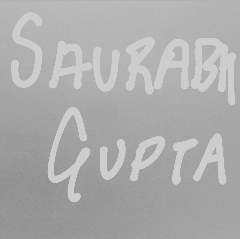

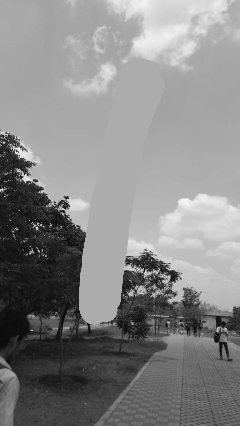

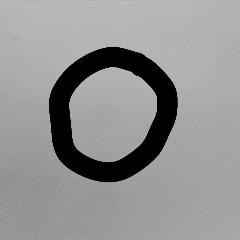

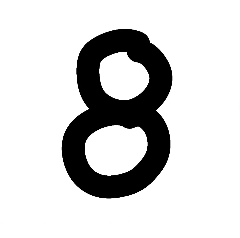

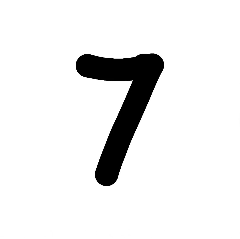

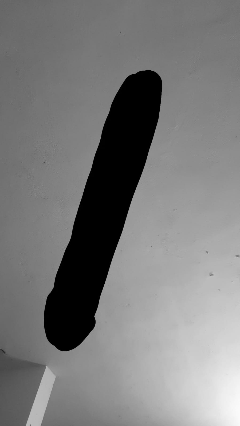

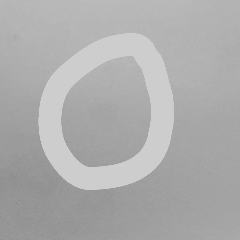

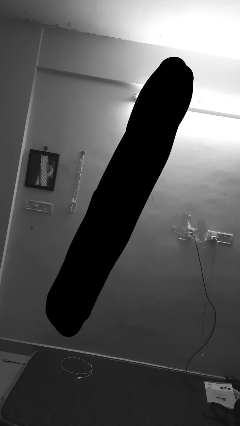

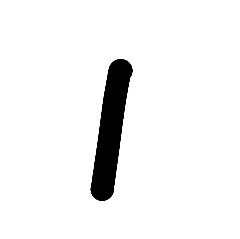

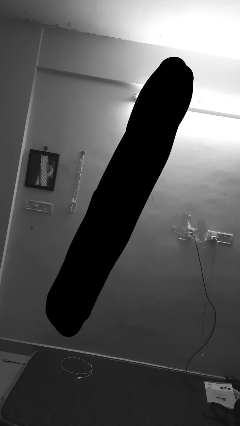

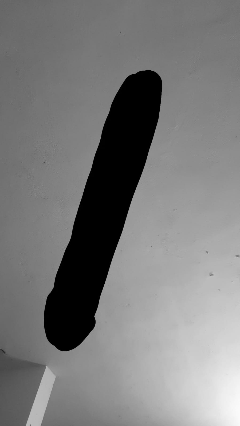

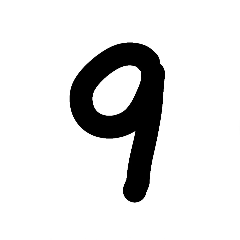

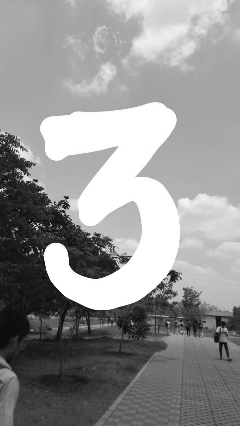

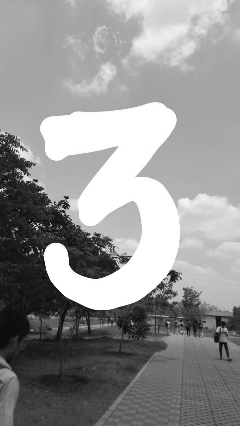

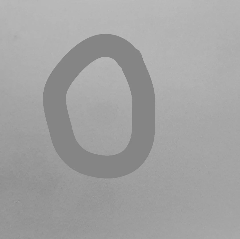

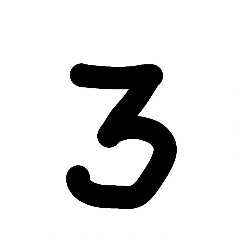

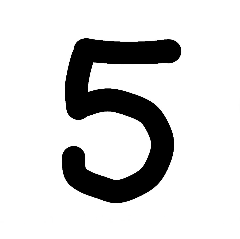

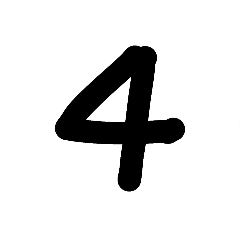

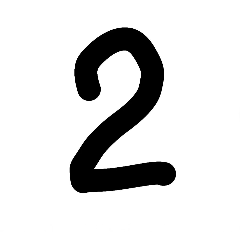

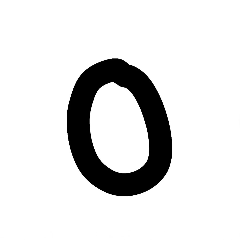

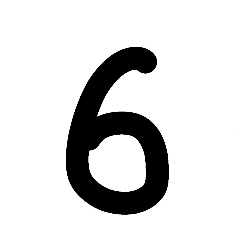

In [14]:


def getGrayImage(dig_img, flag = True,dimension = (28,28)):
  gray_img = []
  for img in dig_img:
    g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if(flag == True):
      (w,h) = (img.shape[1],img.shape[0])
      if w > 240 and h > 240:
        x = float(w)/240
        dimension = (int(w/x),int(h/x))
    r_img = cv2.resize(g_img, dimension)
    gray_img.append(r_img)
  return gray_img

gray_img = getGrayImage(dig_img)

for img in gray_img :
  cv2_imshow(img)

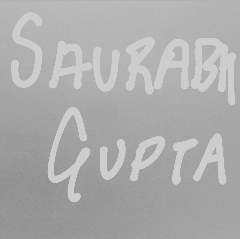

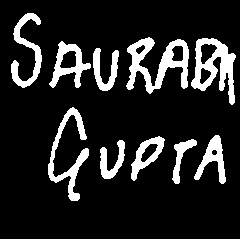

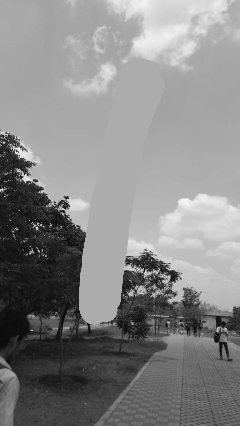

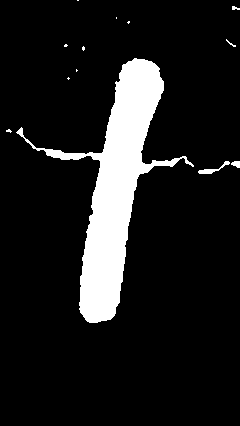

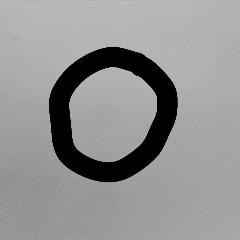

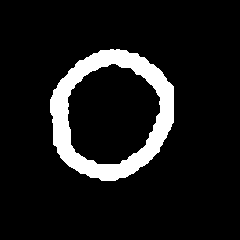

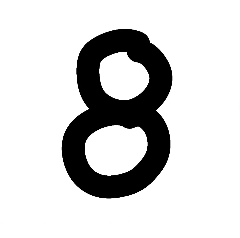

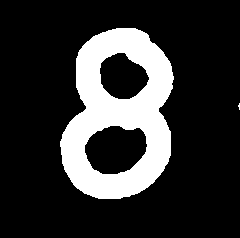

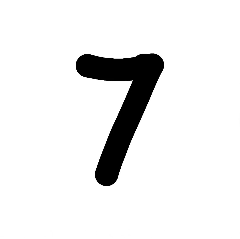

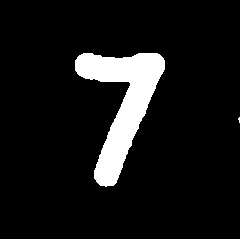

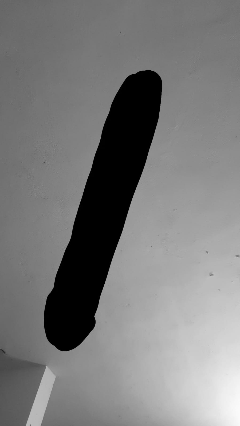

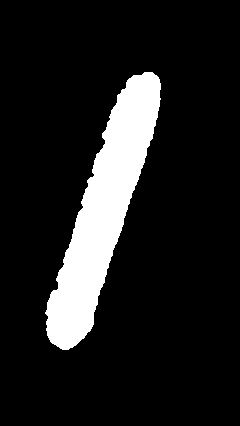

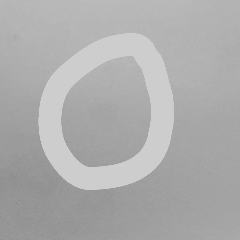

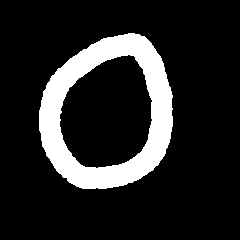

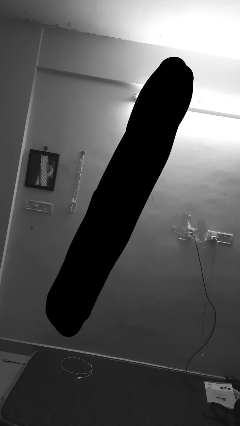

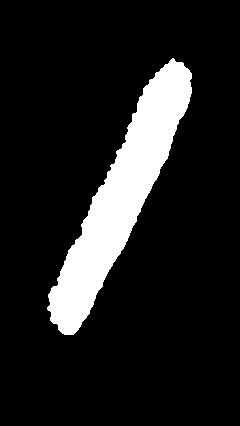

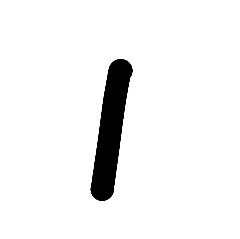

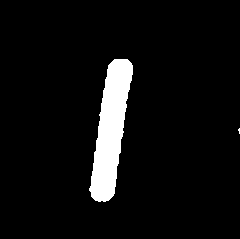

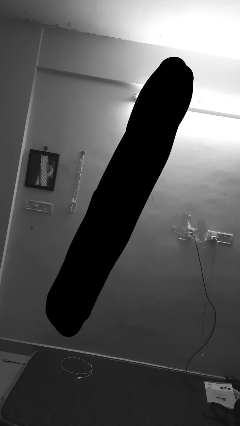

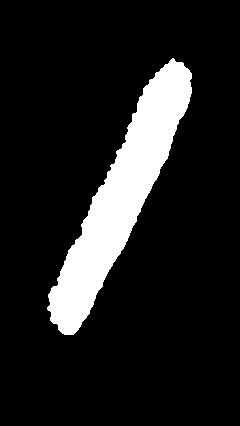

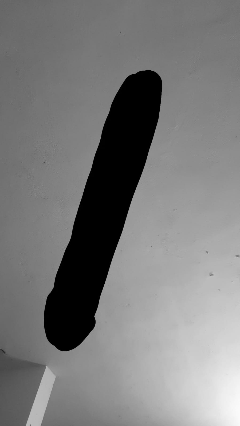

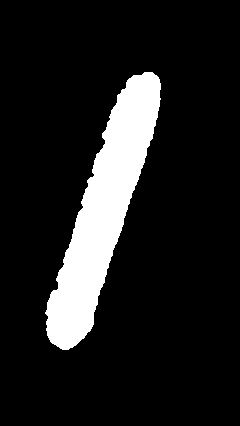

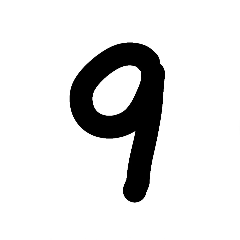

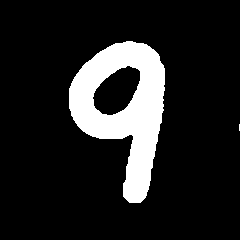

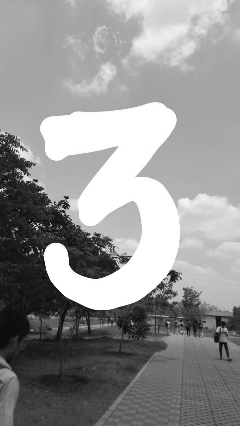

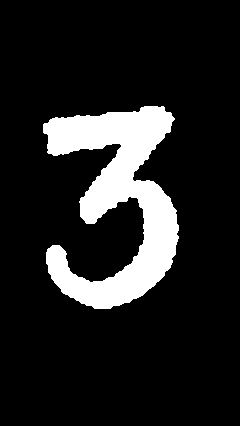

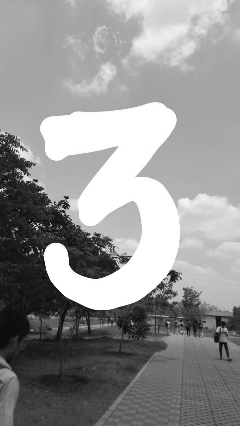

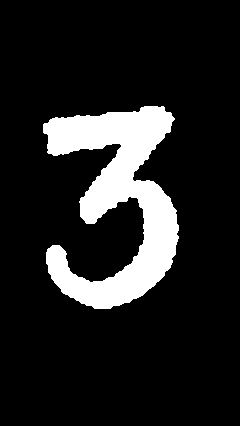

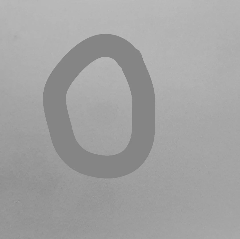

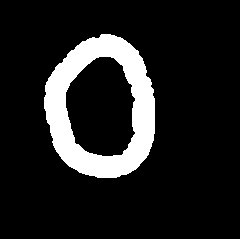

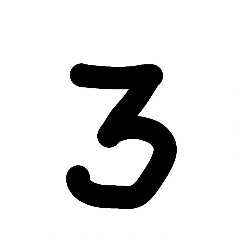

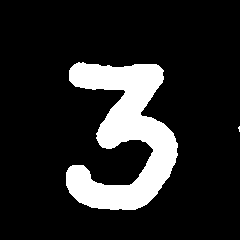

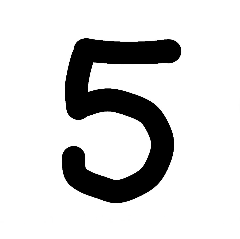

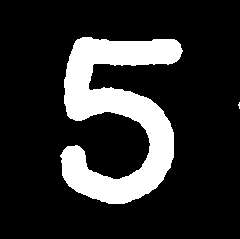

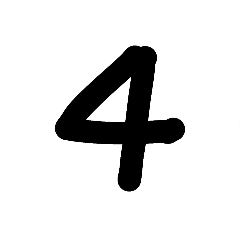

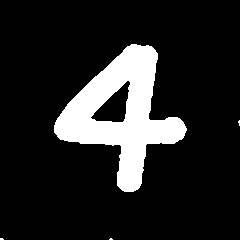

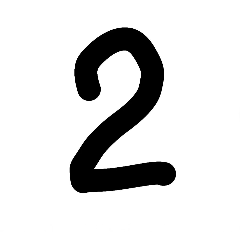

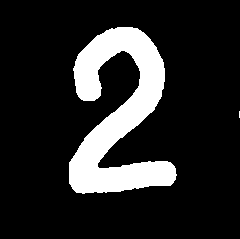

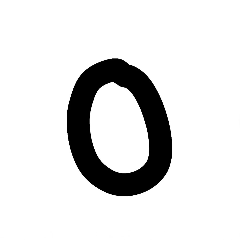

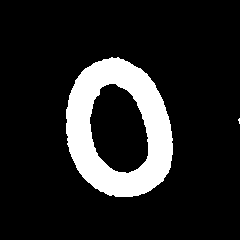

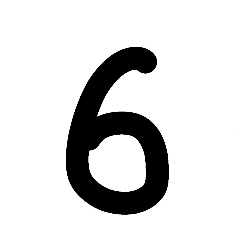

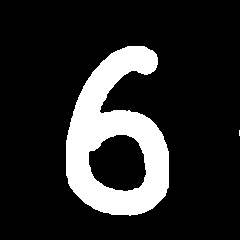

In [15]:
def makeUpImage(img,again = 1):
    
    fimg = cv2.medianBlur(img, 3)
    fimg = cv2.medianBlur(fimg, 3)
    #fimg = cv2.GaussianBlur(fimg, (3,3), 0)
    #fimg = cv2.GaussianBlur(fimg, (3,3), 0)

    (w, h) = fimg.shape
    flat_img = np.ravel(fimg)
    max_val = np.max(flat_img)
    dark = np.zeros(max_val+1)
    freq = np.zeros(max_val+1)

    l = len(freq)
    for x in flat_img:
      freq[x] = freq[x]+1
    

    maxi = -1;
    val = -1;
    
    for x in range(l) :
      if (freq[x] > maxi):
        maxi = freq[x]
        val = x
    for x in range(w):
      for y in range(h):
        if(fimg[x][y]==val):
          fimg[x,y] = 0
        else :
          fimg[x,y] = 255

    if(again != 0):    
      return makeUpImage(fimg,again-1)
    return fimg
t_imgg = []
for img in gray_img :
  cv2_imshow(img)
  img_ = makeUpImage(np.array(img))
  n_img = abs(255-img)
  t_imgg.append(img_)
  cv2_imshow(img_)

x1  239
x2  5
y1  207
y2  7




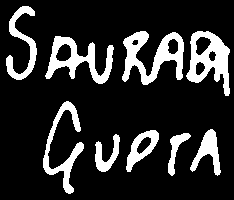

x1  239
x2  12
y1  329
y2  53




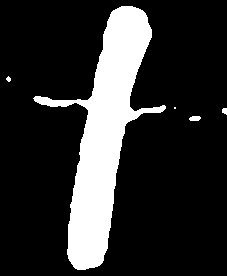

x1  180
x2  44
y1  187
y2  43




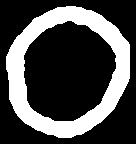

x1  180
x2  54
y1  205
y2  22




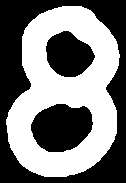

x1  171
x2  69
y1  192
y2  47




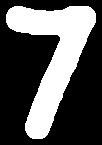

x1  167
x2  40
y1  356
y2  66




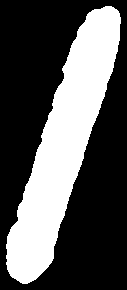

x1  179
x2  33
y1  195
y2  27




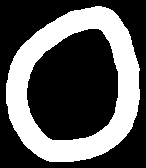

x1  198
x2  42
y1  341
y2  54




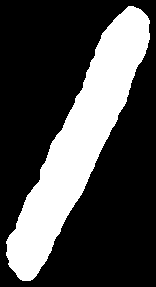

x1  139
x2  84
y1  208
y2  53




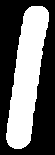

x1  198
x2  42
y1  341
y2  54




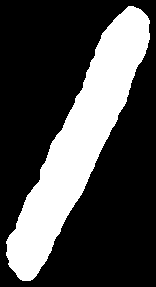

x1  167
x2  40
y1  356
y2  66




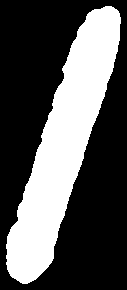

x1  171
x2  63
y1  209
y2  35




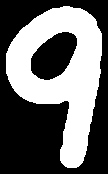

x1  185
x2  37
y1  315
y2  100




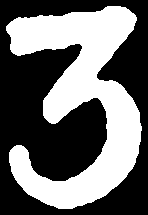

x1  185
x2  37
y1  315
y2  100




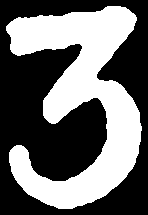

x1  161
x2  38
y1  184
y2  28




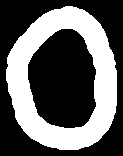

x1  184
x2  60
y1  216
y2  57




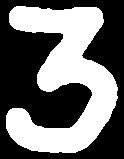

x1  188
x2  55
y1  210
y2  31




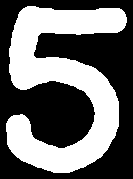

x1  193
x2  48
y1  198
y2  38




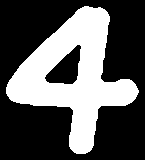

x1  182
x2  63
y1  200
y2  21




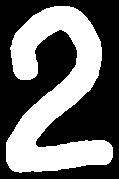

x1  179
x2  60
y1  203
y2  52




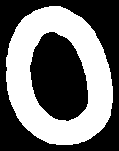

x1  175
x2  60
y1  221
y2  40




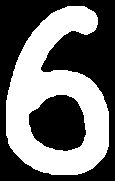

In [16]:
def cropForText(img,color = 255, width = 1,thresh = 1) :
  img = cv2.medianBlur(img, 5)
  img = cv2.medianBlur(img, 5)
  img = cv2.medianBlur(img, 5)
  h = img.shape[0]
  w = img.shape[1]

  x1 = 0
  x2 = w - 1
  y1 = 0
  y2 = h - 1

  for i in range(h-width):
    for j in range(w - width):
      count = 0
      for p in range(width):
        for q in range(width):
          if(img[i+p,j+q] == color):
            count = count + 1
      if count >= thresh :
        y1 = min(max(0, i + 7),h-1)
        break

  for i in reversed(range(h-width)):
    for j in reversed(range(w - width)):
      count = 0
      for p in range(width):
        for q in range(width):
          if(img[i+p,j+q] == color):
            count = count + 1
      if count >= thresh :
        y2 = max(0,i-7)
        break


  
  for j in range(w - width):
    for i in range(h-width):
      count = 0
      for p in range(width):
        for q in range(width):
          if(img[i+p,j+q] == color):
            count = count + 1
      if count >= thresh:
        x1 = min(max(0, j + 7),w-1)
        break

  
  for j in reversed(range(w - width)):
    for i in reversed(range(h-width)):
      count = 0
      for p in range(width):
        for q in range(width):
          if(img[i+p,j+q] == color):
            count = count + 1
      if count >= thresh :
        x2 = max(0,j-7)
        break
  x2 = x2 + 1
  y2 = y2 + 1
  print("x1 ",x1)
  print("x2 ",x2)
  print("y1 ",y1)
  print("y2 ",y2)
  print("\n")
  cropped_img = img[y2:y1,x2:x1]
  
  return cropped_img

crp_img = []

for img in t_imgg:
  c_img = cropForText(img)
  crp_img.append(c_img)
  cv2_imshow(c_img)

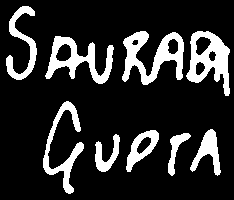

(326, 326)


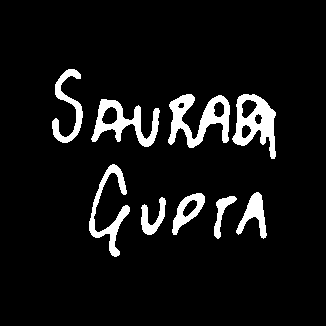

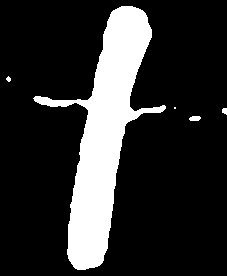

(386, 386)


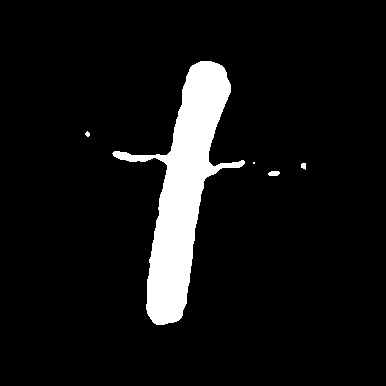

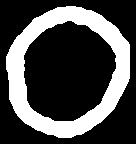

(200, 200)


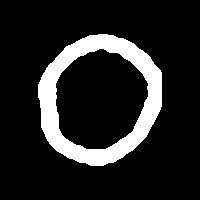

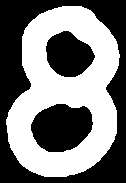

(256, 256)


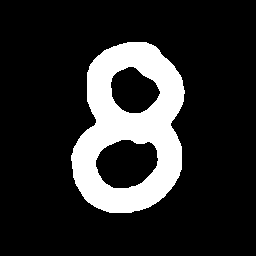

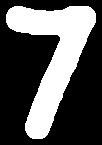

(204, 204)


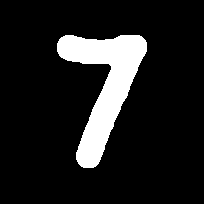

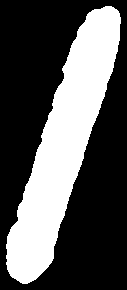

(406, 406)


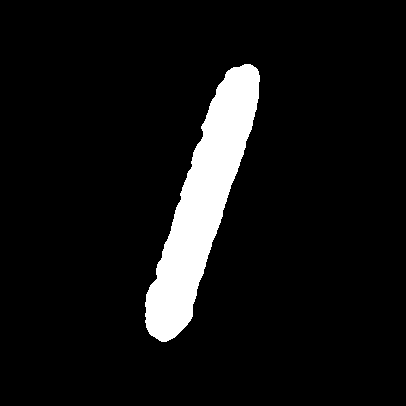

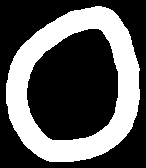

(234, 234)


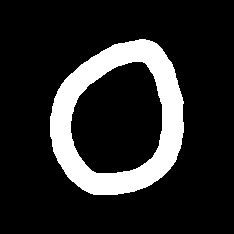

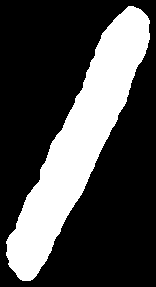

(402, 402)


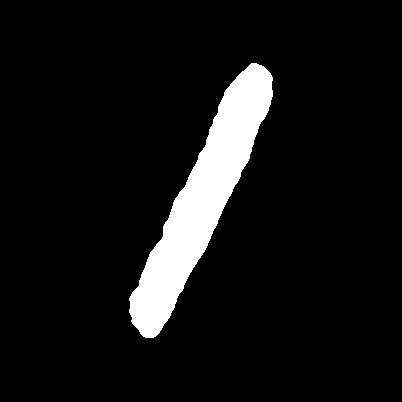

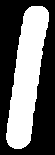

(218, 218)


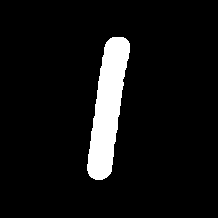

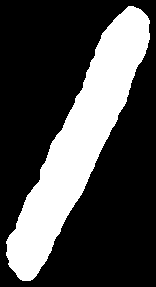

(402, 402)


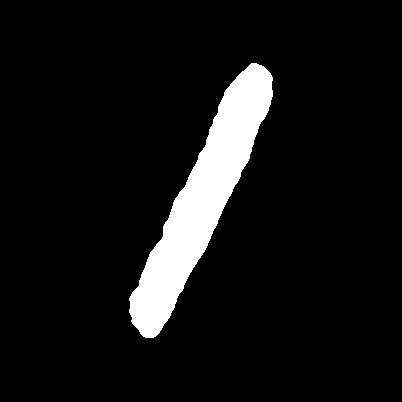

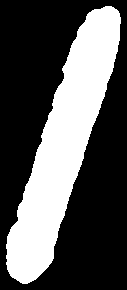

(406, 406)


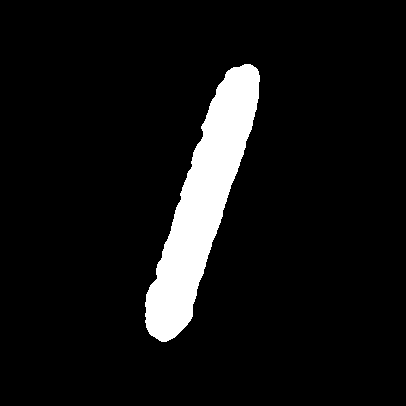

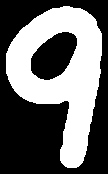

(242, 242)


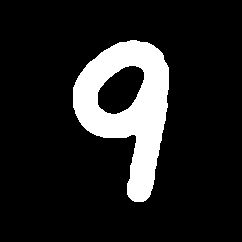

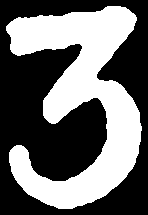

(302, 302)


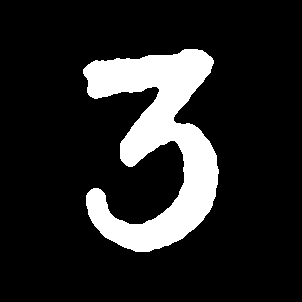

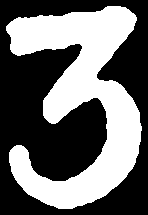

(302, 302)


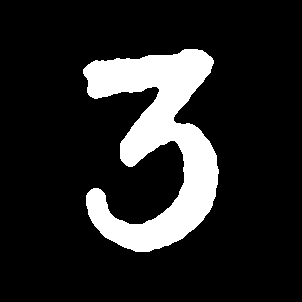

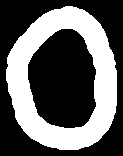

(218, 218)


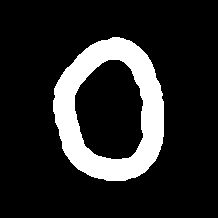

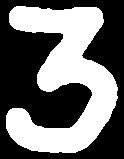

(222, 222)


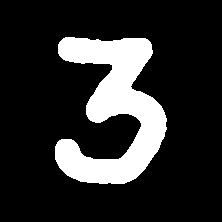

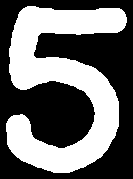

(250, 250)


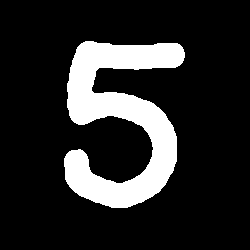

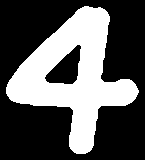

(224, 224)


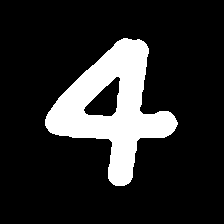

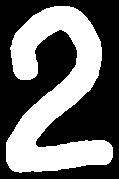

(250, 250)


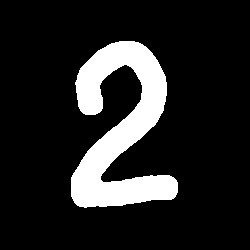

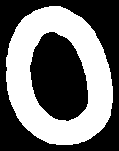

(212, 212)


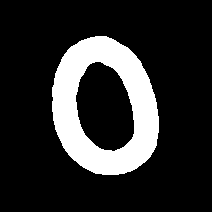

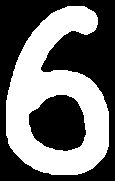

(254, 254)


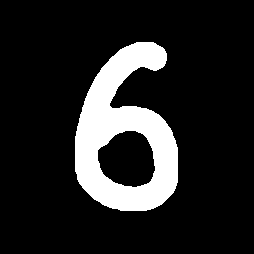

In [17]:
def toEven(x) :
  if x % 2 == 0:
    return x

  else :
    return x+1

def imagePadding(img,color = 0,padp = 0.20) :
  h = img.shape[0]
  w = img.shape[1]

  diff = abs(h-w)

  extra = toEven(int(2*int(padp*max(float(h),float(w))) + max(w,h)))
  fimg = np.zeros(extra*extra).reshape((extra,extra))

  ew = int((extra - w)/2)
  eh = int((extra - h)/2)

  fimg = fimg + color
  fimg = fimg.astype('int32')

  for i in range(h):
    for j in range(w):
      x = int(eh+i)
      y = int(ew+j)
      fimg[x,y] = img[i,j]

  fimg = np.array(fimg, dtype='uint8')

  return fimg

padd_imgg = []

for img in crp_img :
  cv2_imshow(img)
  p_img = imagePadding(img)
  padd_imgg.append(p_img)
  print(p_img.shape)
  cv2_imshow(p_img)




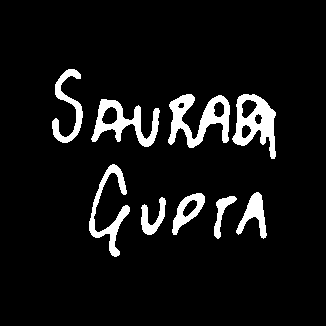

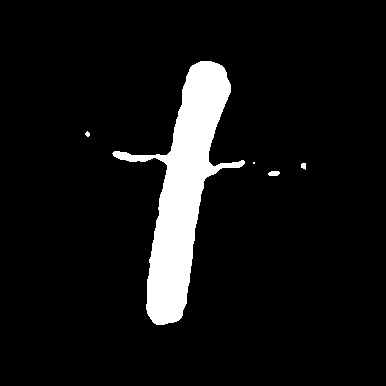

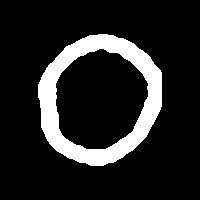

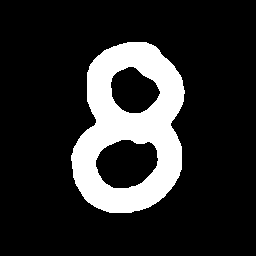

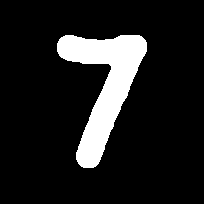

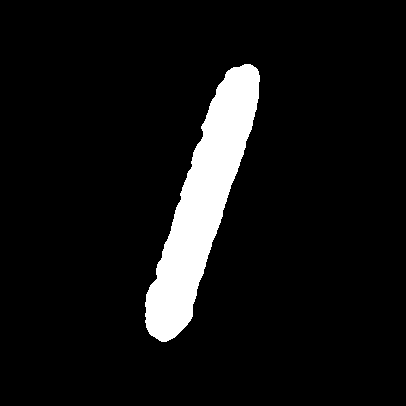

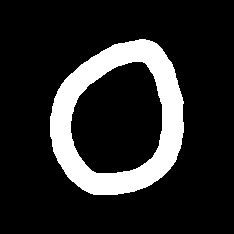

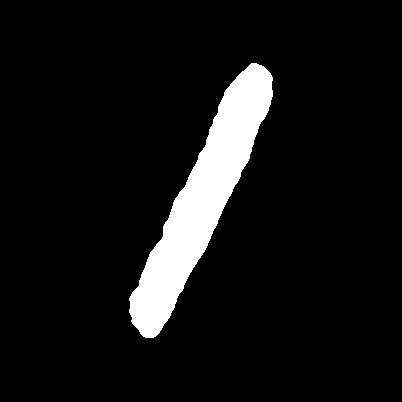

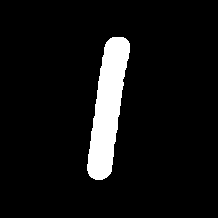

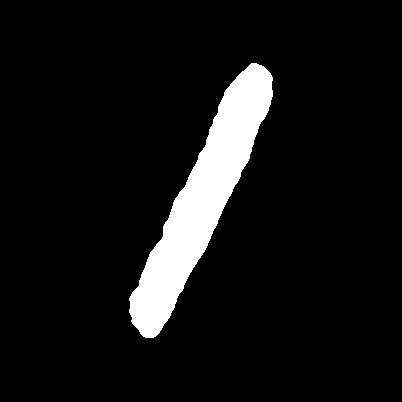

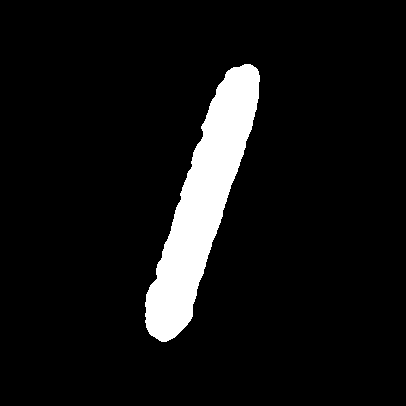

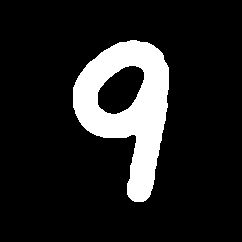

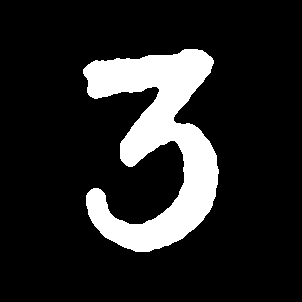

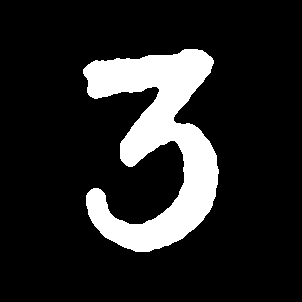

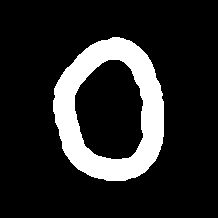

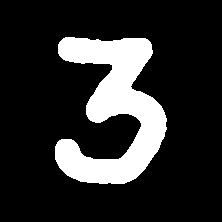

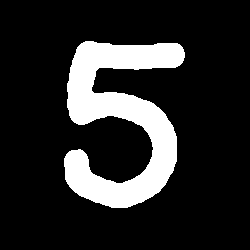

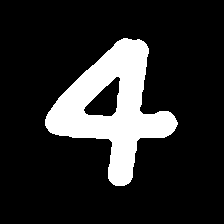

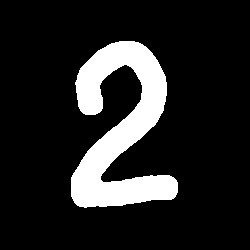

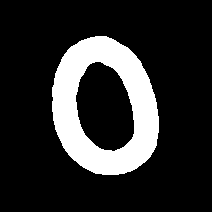

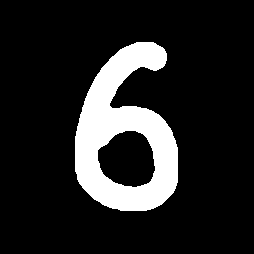

In [18]:
for img in padd_imgg:
  cv2_imshow(img)

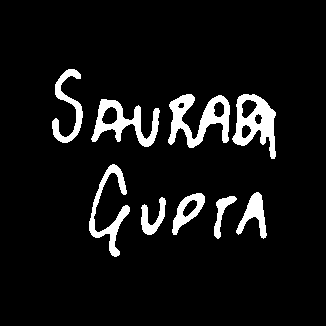

(28, 28)


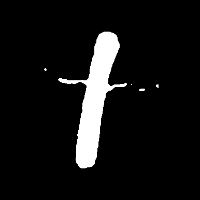

(28, 28)


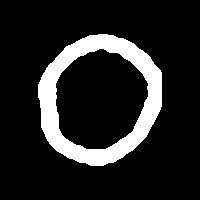

(28, 28)


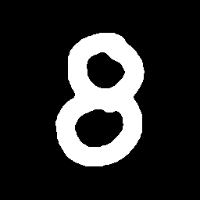

(28, 28)


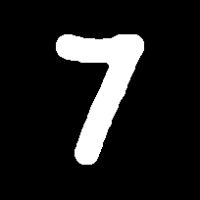

(28, 28)


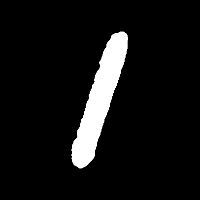

(28, 28)


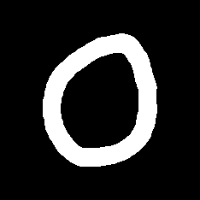

(28, 28)


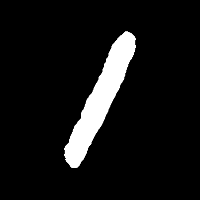

(28, 28)


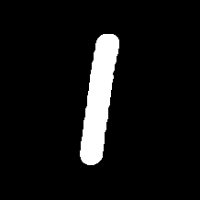

(28, 28)


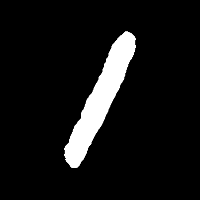

(28, 28)


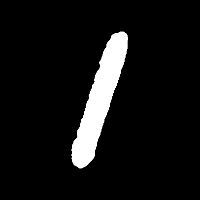

(28, 28)


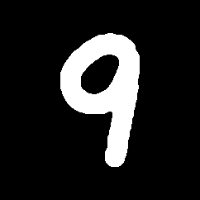

(28, 28)


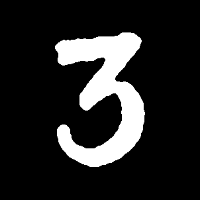

(28, 28)


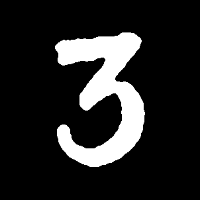

(28, 28)


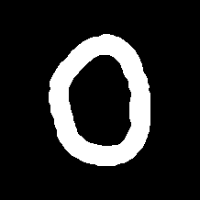

(28, 28)


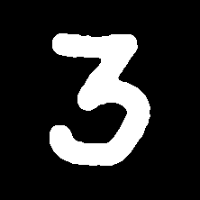

(28, 28)


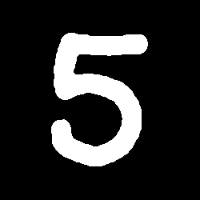

(28, 28)


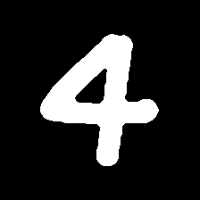

(28, 28)


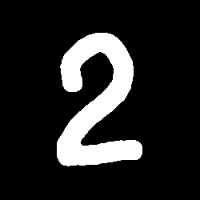

(28, 28)


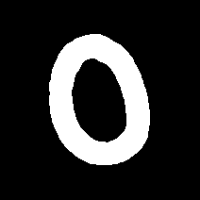

(28, 28)


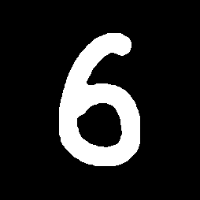

(28, 28)


In [19]:
def resizeImg(img, dim = (28,28)):
  rimg = cv2.resize(img, dim)
  return rimg

r_imgg = []
for img in padd_imgg :
  cv2_imshow(img)
  r_img = resizeImg(img)
  r_imgg.append(r_img)
  print(r_img.shape)
  cv2_imshow(r_img)

  for i in range(len(padd_imgg)):
    img = padd_imgg[i]
    x = min(200,img.shape[0])
    dim = (x,x)
    padd_imgg[i] = resizeImg(img,dim)

In [20]:
for img in r_imgg:
  cv2_imshow(img)

In [21]:
#Defining useful functions to process input

def gray2Dto1D(gray_img_list) :
  oneD_mat = []
  for img in gray_img_list:
    oneD_mat.append(np.ravel(img))
  
  return oneD_mat

t_img = gray2Dto1D(r_imgg)

test_images = np.array([])
for img in t_img :
  img = img/255
  test_images = np.append(test_images,img)

n = len(t_img)
d_2 = len(t_img[0])
test_images = test_images.reshape(n,d_2)
print(test_images.shape)

(21, 784)


In [22]:
#Deep Learning Model Training and Implementation

train_model = False

if(train_model == True):
  
  #The Dataset

  #The Data Set used here is taken from Internet for Educational & Demonstration purpose only. The author of this project doesn't claim the ownership of this dataset. The complete ownership of this dataset belongs to the organisation which created this dataset.
  #Dataset taken from : (https://www.kaggle.com/code/ngbolin/mnist-dataset-digit-recognizer/input)

  #Let's load the dataset to a Pandas DataFrame

  # Load the training dataset

  df_train = pd.read_csv(path.dataset['training'])
  df_test = pd.read_csv(path.dataset['testing'])


  df_train.head() # 784 features (pixels), 1 label

  df_test.head()

  #For training purpose
  df_features = df_train.iloc[:, 1:785]
  df_label = df_train.iloc[:, 0]

  #For Testing/Prediction
  X_test = df_test.iloc[:, 0:784]

  print(X_test.shape)

  X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, test_size = 0.2,random_state = 1212)

  X_train = X_train.values.reshape(33600,784)

  X_cv = X_cv.values.reshape(8400,784)

  X_test = X_test.values.reshape(28000, 784)

  print((min(X_train[1]), max(X_train[1])))

  # Feature Normalization 
  X_train = X_train.astype('float32'); X_cv= X_cv.astype('float32'); X_test = X_test.astype('float32')
  X_train /= 255; X_cv /= 255; X_test /= 255

  # Convert labels to One Hot Encoded
  num_digits = 10
  y_train = keras.utils.to_categorical(y_train, num_digits)
  y_cv = keras.utils.to_categorical(y_cv, num_digits)

  # Printing 2 examples of labels after conversion
  print(y_train[0]) # 2
  print(y_train[3]) # 7

  """**Model Fitting**"""

  #Mark this as True to re-train the deep learning model
  #Suggestion :- if you already have a saved model then use it, run the below code only when you want to retrain the model

  def trainDLModel(flag = False) :
    if (flag == True):
      # Input Parameters
      n_input = 784 # number of features
      n_hidden_1 = 300
      n_hidden_2 = 100
      n_hidden_3 = 100
      n_hidden_4 = 200
      num_digits = 10

      # Insert Hyperparameters
      learning_rate = 0.1
      training_epochs = 20
      batch_size = 100

      Inp = Input(shape=(784,))
      x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
      x = Dropout(0.3)(x)
      x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
      x = Dropout(0.3)(x)
      x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
      x = Dropout(0.3)(x)
      x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
      output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

      # Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer
      model4 = Model(Inp, output)
      model4.summary() # We have 297,910 parameters to estimate

      model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
      history = model4.fit(X_train, y_train,batch_size = batch_size,epochs = training_epochs,validation_data=(X_cv, y_cv))

      # Saving Model
      model_folder = path.model
      model_name = 'digit-recognizer-model'
      model_path = model_folder #+ r'/' + model_name
      model4.save(model_path)

      train_model = False

  trainDLModel(train_model)

In [23]:
# Using the saved Model
model_folder = path.model
model_path = model_folder

#Storing the saved modle into restore_model - it will be used to predict future results
restore_model = keras.models.load_model(model_path)

n_img = 1
test_pred = pd.DataFrame(restore_model.predict(test_images, batch_size=min(n_img,100)))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))

#Renaming Index as ImageID
test_pred.index.name = 'ImageID'

#Renaming Column 0 as Label and then readding index column 
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()


test_pred['ImageID'] = test_pred['ImageID'] + 1
test_pred.head()
#print(test_pred)

labels = np.array(test_pred['Label'])
#print(labels)


# Saving Images in the directory
def saveImageByID(folder,names,images, name ='Digit-') :
  limg = len(images)
  lnm = len(names)
  for i in range(min(limg,lnm)):
    # Filename
    filename = folder_path + r'/'+ name +''+ str(names[i]) + '-- Img- '+ str(i) +'.jpg'
    # Using cv2.imwrite() method
    # Saving the image
    cv2.imwrite(filename, images[i])
def createNames(name,n):
  name_list = []

  for i in range(n):
    name_list.append(name+'-'+str(i+1))

  return name_list

# this_folder = this_folder = '/content/drive/MyDrive/Projects/Web-Development/Hand-Written-Digit-Recognition/'
# digit_img_orig = 'Digits/Original/'
# digit_img_rsz_test = 'Digits/Test-Resize/'
# digit_img_test = 'Digits/Test/'

#Clearing Image Folders
path.images.clearOriginal()
path.images.clearIntermediate()
path.images.clearTest()


#Saving Original Image in Original Folder
folder_path = path.images.original
saveImageByID(folder_path,createNames('Original',len(dig_img)),dig_img,'')

#Saving Intermediate (Processed-Padded Image) in Intermediate Folder
folder_path = path.images.intermediate
saveImageByID(folder_path,createNames('Intermediate',len(padd_imgg)),padd_imgg,'')

#Saving Resized Gray Image in Tes-Resize Folder
folder_path = path.images.test
saveImageByID(folder_path,createNames('Test',len(r_img)),r_imgg,'')

#Saving Final Labeled Image in Result Folder
folder_path = path.images.result
saveImageByID(folder_path,labels,padd_imgg)

21/21 [==============================] - 0s 2ms/step
/content/drive/MyDrive/Projects/Web-Development/Hand-Written-Digit-Recognition/Digits/Intermediate


0


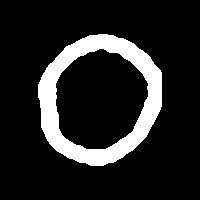

5


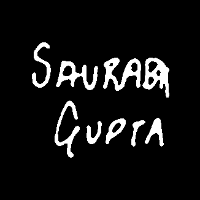

0


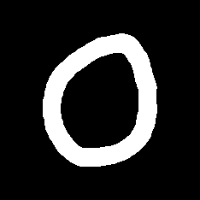

1


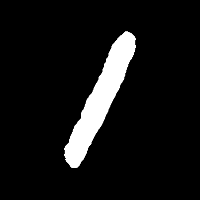

1


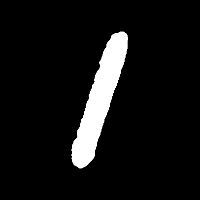

1


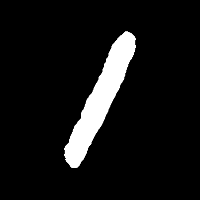

1


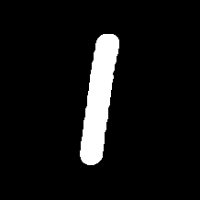

1


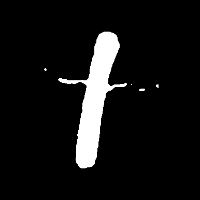

9


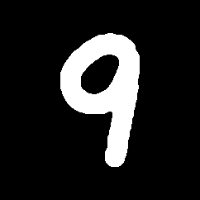

3


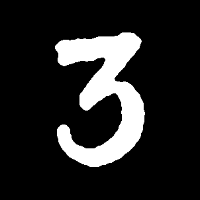

3


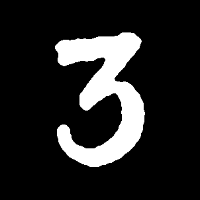

0


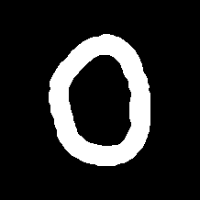

3


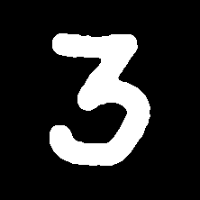

5


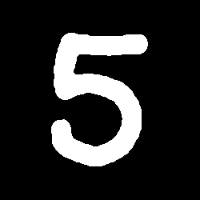

4


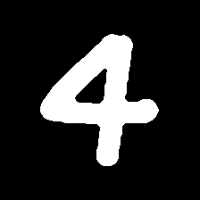

2


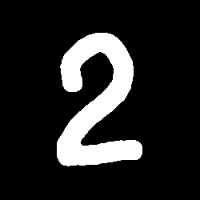

6


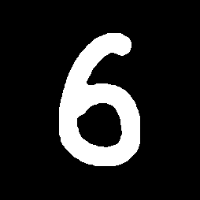

0


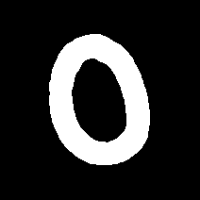

8


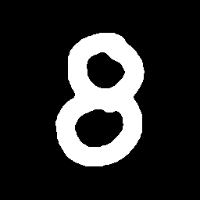

1


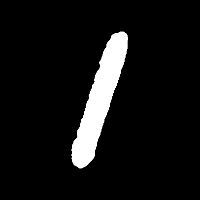

7


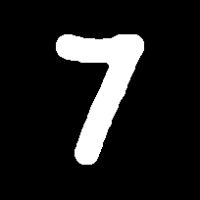

In [24]:
for i in range(len(labels)):
  print(labels[i])
  cv2_imshow(padd_imgg[i])